# Exploratory Data Analysis

## Setup

In [73]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns


from ames_house_price_prediction.config import RAW_DATA_DIR, FEATURES, TARGET

In [74]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

plt.style.use('seaborn-v0_8-pastel')

In [75]:
data = pd.read_csv(RAW_DATA_DIR / "train.csv", index_col="Id")

In [76]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

We can start the analysis using __a minimum set of relevant features__ and include/build more later on. 

The advantages to this approach are:
1. get a baseline model early on and iterate on that,
1. perform a robust initial data analysis as well as for each additional feature,
1. better estimate the importance of adding a feature and its implications,
1. avoid getting overwhelmed by all the possibilities around analysis, feature engineering, etc.

Caveats to this approach:
1. might not be possible in case of an extremely large feature space; feature selection might be more suitable.

So, based on experience, the relevant features identified are:
* the type of the building &rarr; `BldgType` or `HouseStyle`
* the size of the house &rarr; `LotArea`
* the location of the house &rarr; `Neighborhood`
* the age of the house at the time it was sold &rarr; `LotAge` = `YrSold` - `YearBuilt`
* the years since the house was remodelled &rarr; `YearsSinceRemod` = `YrSold` - `YearRemodAdd`  
    _Note that __-1__ refers to a property that has not been remodelled._
* the overall quality of the house &rarr; `OverallQual`
* the overall condition of the house &rarr; `OverallCond`

In [78]:
cols = [
    "BldgType",
    "LotArea",
    "Neighborhood",
    "YearBuilt",
    "YrSold",
    "YearRemodAdd",
    "OverallQual",
    "OverallCond",
    "SaleCondition",
    TARGET
]
df = data.loc[:, cols].assign(
    LotAge=lambda x: x["YrSold"] - x["YearBuilt"],
    YearsSinceRemod=lambda x: np.where(
        x["YearRemodAdd"] > x["YearBuilt"], x["YrSold"] - x["YearRemodAdd"], -1
    ),
)

## Inspection

In [79]:
df.head(20)

,BldgType,LotArea,Neighborhood,YearBuilt,YrSold,YearRemodAdd,OverallQual,OverallCond,SaleCondition,SalePrice,LotAge,YearsSinceRemod
Id,,,,,,,,,,,,
1,1Fam,8450,CollgCr,2003,2008,2003,7,5,Normal,208500,5,-1
2,1Fam,9600,Veenker,1976,2007,1976,6,8,Normal,181500,31,-1
3,1Fam,11250,CollgCr,2001,2008,2002,7,5,Normal,223500,7,6
4,1Fam,9550,Crawfor,1915,2006,1970,7,5,Abnorml,140000,91,36
5,1Fam,14260,NoRidge,2000,2008,2000,8,5,Normal,250000,8,-1
6,1Fam,14115,Mitchel,1993,2009,1995,5,5,Normal,143000,16,14
7,1Fam,10084,Somerst,2004,2007,2005,8,5,Normal,307000,3,2
8,1Fam,10382,NWAmes,1973,2009,1973,7,6,Normal,200000,36,-1
9,1Fam,6120,OldTown,1931,2008,1950,7,5,Abnorml,129900,77,58


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   BldgType         1460 non-null   object
 1   LotArea          1460 non-null   int64 
 2   Neighborhood     1460 non-null   object
 3   YearBuilt        1460 non-null   int64 
 4   YrSold           1460 non-null   int64 
 5   YearRemodAdd     1460 non-null   int64 
 6   OverallQual      1460 non-null   int64 
 7   OverallCond      1460 non-null   int64 
 8   SaleCondition    1460 non-null   object
 9   SalePrice        1460 non-null   int64 
 10  LotAge           1460 non-null   int64 
 11  YearsSinceRemod  1460 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 148.3+ KB


In [81]:
df.describe()

,LotArea,YearBuilt,YrSold,YearRemodAdd,OverallQual,OverallCond,SalePrice,LotAge,YearsSinceRemod
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,2007.815753,1984.865753,6.099315,5.575342,180921.195890,36.547945,9.572603
std,9981.264932,30.202904,1.328095,20.645407,1.382997,1.112799,79442.502883,30.250152,18.917144
min,1300.000000,1872.000000,2006.000000,1950.000000,1.000000,1.000000,34900.000000,0.000000,-1.000000
25%,7553.500000,1954.000000,2007.000000,1967.000000,5.000000,5.000000,129975.000000,8.000000,-1.000000
50%,9478.500000,1973.000000,2008.000000,1994.000000,6.000000,5.000000,163000.000000,35.000000,-1.000000
75%,11601.500000,2000.000000,2009.000000,2004.000000,7.000000,6.000000,214000.000000,54.000000,10.000000
max,215245.000000,2010.000000,2010.000000,2010.000000,10.000000,9.000000,755000.000000,136.000000,60.000000


Conveniently, the features do not have any missing values.

## Univariate Analysis

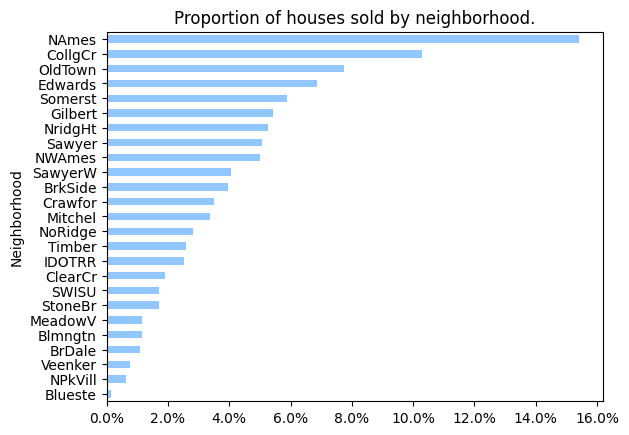

In [82]:
# Popular neighborhoods are usually associated with higher property prices.
ax = df.Neighborhood.value_counts(normalize=True, ascending=True).mul(100).plot(kind='barh')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Proportion of houses sold by neighborhood.")
plt.show()

In [83]:
# Properties sold under normal circumstances is naturally the majority.
# However, lower prices might be associated with sales under irregular circumstances. 
# For example, an auction or a sales between members of the same family.
df.SaleCondition.value_counts(normalize=True)

SaleCondition
Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: proportion, dtype: float64

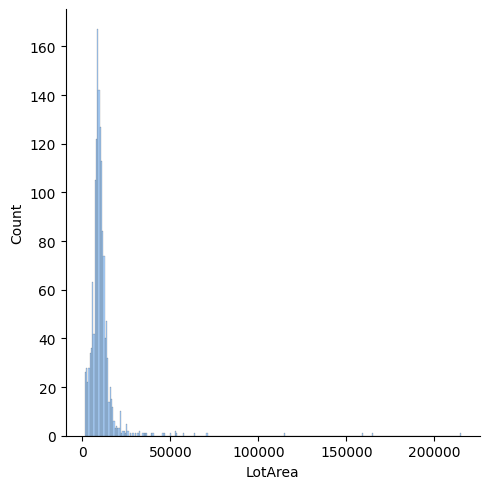

In [84]:
ax = sns.displot(df, x="LotArea", kind='hist')

The property area is heavily skewed. We'll need to check for potential outliers.

In [85]:
def mask_outliers(ser: pd.Series, factor: float = 1.5) -> pd.Series:
    Q1 = ser.quantile(0.25)
    Q3 = ser.quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - factor * IQR
    UB = Q3 + factor * IQR
    return (ser < LB) | (ser > UB)

In [86]:
# create mask for outliers to investigate the data
area_mask = mask_outliers(df.LotArea, factor=3)

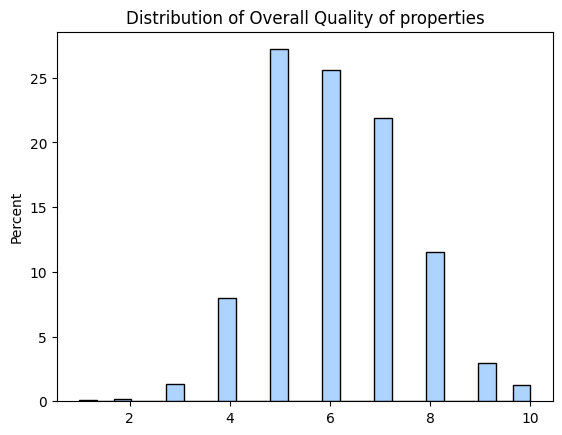

In [87]:
# The overall quality of properties resembles a normal distribution.
_ = sns.histplot(df["OverallQual"], stat="percent")
_ = plt.title("Distribution of Overall Quality of properties")
_ = plt.xlabel("")
plt.show()

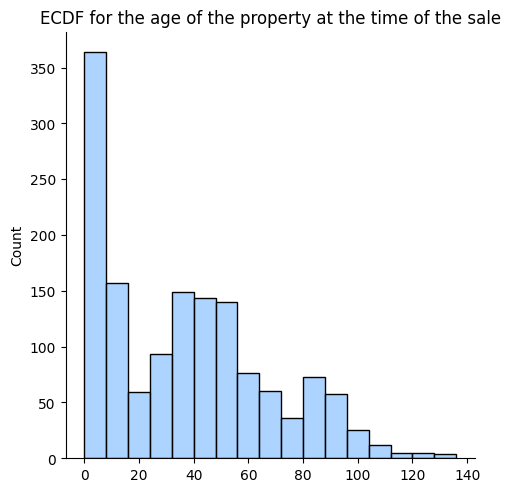

In [88]:
# We see that there are quite a lot of recently built properties in the area.
_ = sns.displot(df["LotAge"], kind='hist')
_ = plt.title("ECDF for the age of the property at the time of the sale")
_ = plt.xlabel("")
plt.show()

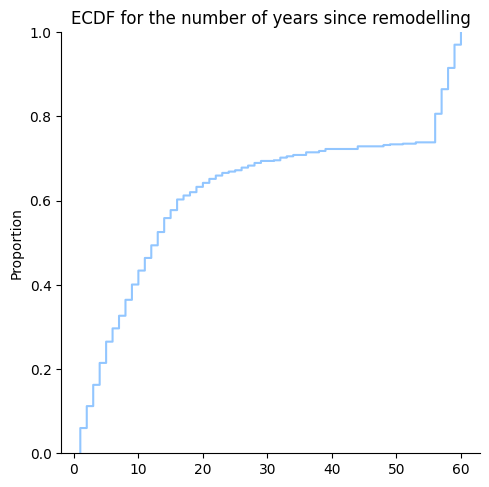

In [89]:
# We see that properties that did get remodeled, approximately 60% of them were remodeled within 20 years before they were sold.
# Experiment with binning this feature into: <5 years ago, <10 y.a., >10y.a., NA
# Potentially cap the values to a max of 15 years as remodeling done many years ago are already obsolete.
_ = sns.displot(df[df["YearsSinceRemod"]>0]["YearsSinceRemod"], kind='ecdf')
_ = plt.title("ECDF for the number of years since remodelling")
_ = plt.xlabel("")
plt.show()

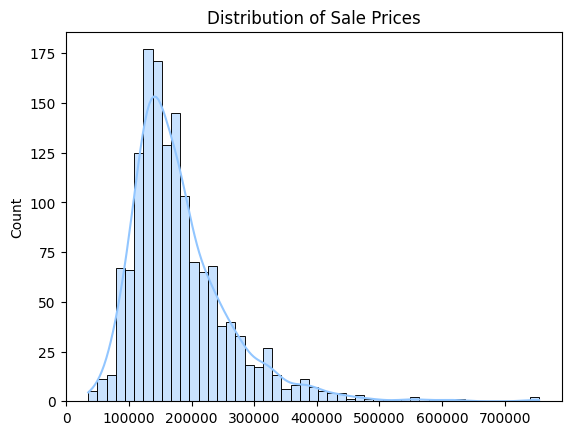

In [90]:
_ = sns.histplot(data[[TARGET]], x=TARGET, kde=True)
_ = plt.title("Distribution of Sale Prices")
_ = plt.xlabel("")
plt.show()

### Target Transformations

In [91]:
from sklearn.preprocessing import QuantileTransformer


transformer = QuantileTransformer(output_distribution="normal")
target_transformed = transformer.fit_transform(data[[TARGET]])

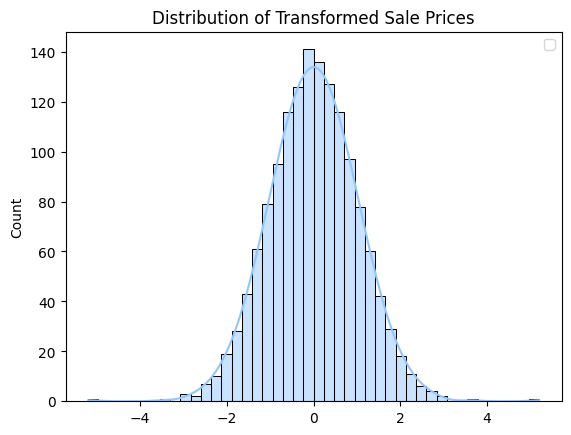

In [92]:
_ = sns.histplot(target_transformed, kde=True)
_ = plt.title("Distribution of Transformed Sale Prices")
_ = plt.xlabel("")
_ = plt.legend("")
plt.show()

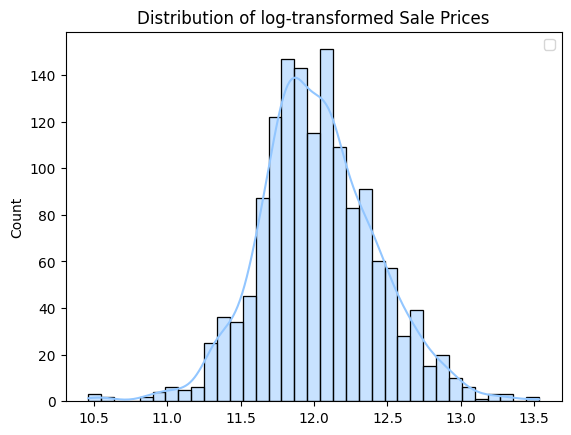

In [93]:
_ = sns.histplot(np.log(data[[TARGET]]), kde=True)
_ = plt.title("Distribution of log-transformed Sale Prices")
_ = plt.xlabel("")
_ = plt.legend("")
plt.show()

Both transformations work really well. The `QuantileTranformer` will be used due to its direct integration with scikit-learn pipelines.

## Bivariate Analysis

### Correlation matrix

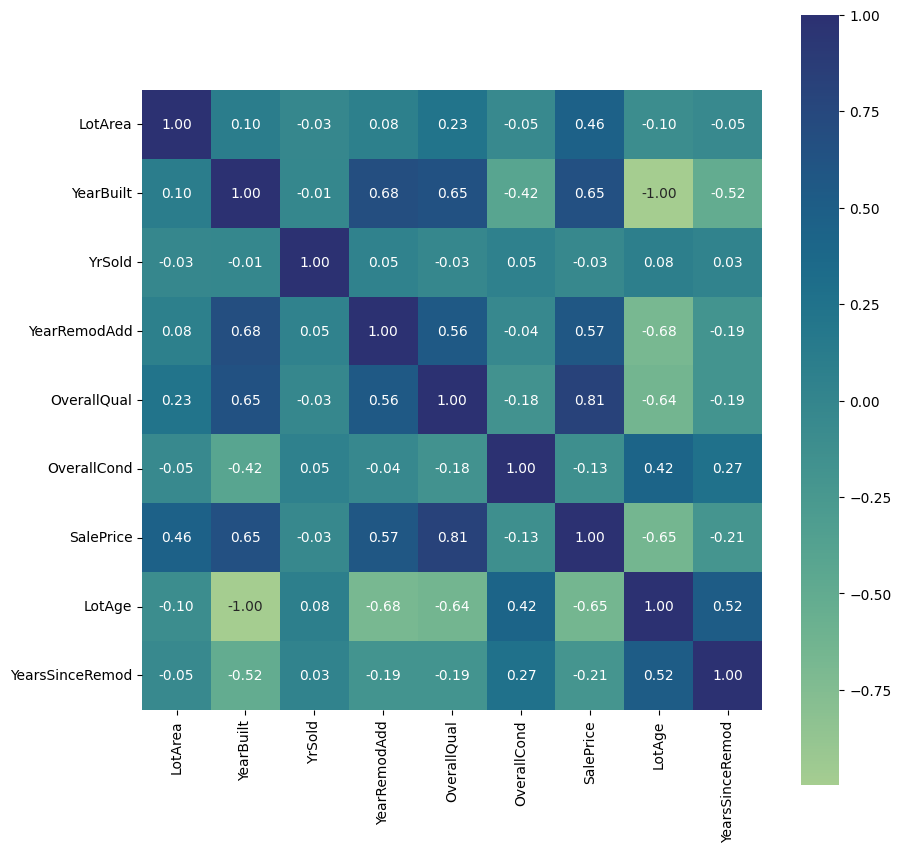

In [94]:
plt.subplots(figsize=(10, 10))
_ = sns.heatmap(
    df.select_dtypes([int, float]).corr(method="spearman"),
    annot=True,
    square=True,
    fmt=".2f",
    cmap="crest",
)

## SANDBOX

In [95]:
data.ExterQual.value_counts(dropna=False, normalize=True).sort_index()

ExterQual
Ex    0.035616
Fa    0.009589
Gd    0.334247
TA    0.620548
Name: proportion, dtype: float64

In [96]:
# preprocessing pipeline step
from sklearn.preprocessing import OrdinalEncoder

ord_features = ["FireplaceQu", "PoolQC"]

enc = OrdinalEncoder(dtype=int, categories=len(ord_features)*[["Po", "Fa", "TA", "Gd", "Ex"]], handle_unknown="use_encoded_value", unknown_value=-1)
encoded = enc.fit_transform(data[ord_features])
encoded[:10]

array([[-1, -1],
       [ 2, -1],
       [ 2, -1],
       [ 3, -1],
       [ 2, -1],
       [-1, -1],
       [ 3, -1],
       [ 2, -1],
       [ 2, -1],
       [ 2, -1]])